![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [51]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

0         11
1         16
2         12
3          6
4          9
          ..
185710    11
185711    18
185712    10
185713    16
185714     9
Name: TIME_OCC_hour, Length: 185715, dtype: int64


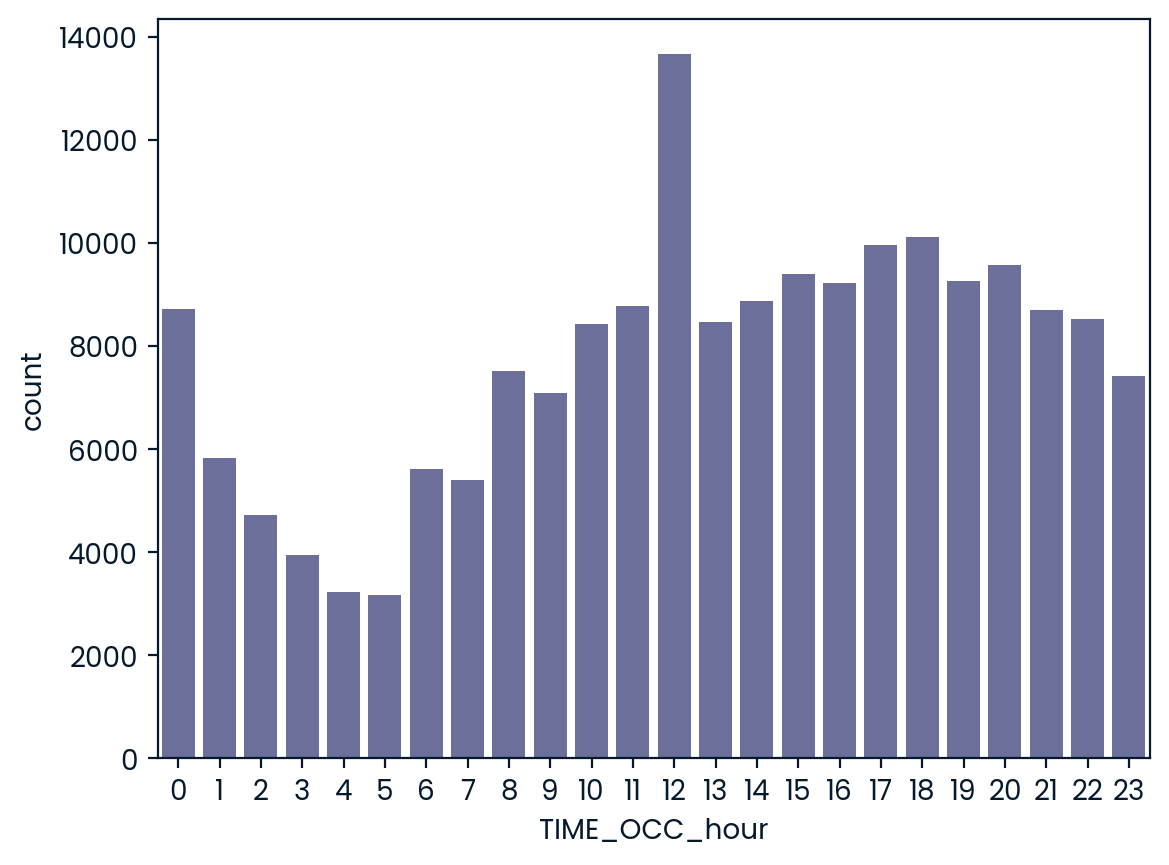

12


In [52]:
# checking variable types
crimes.dtypes


# crimes["timeocc datetime"]=pd.to_datetime(crimes['TIME OCC']) the piece of code doesn't work because its not in the standard date-time format
crimes['TIME OCC']=crimes['TIME OCC'].astype(int)
crimes['TIME_OCC_hour']=crimes['TIME OCC'].apply(lambda x: int(x/100))
print(crimes['TIME_OCC_hour'])

#plotting countplot/histogram of occurences, count plot would be better because it shows all possible xticks on the x axis, histograms don't
sns.countplot(x='TIME_OCC_hour', data=crimes)
plt.show()

#out of a quick glance the "happy hour" for crime would be 2PM. Which is uncanny
peak_crime_hour=int(crimes['TIME_OCC_hour'].mode())
print(peak_crime_hour)

Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location

Rates for all hours 
 Central        0.080467
Southwest      0.064319
77th Street    0.063210
Pacific        0.053431
Hollywood      0.052564
Southeast      0.051536
Olympic        0.050691
Newton         0.049280
Van Nuys       0.046421
N Hollywood    0.045780
Wilshire       0.045672
Topanga        0.045651
Rampart        0.044940
West Valley    0.043626
West LA        0.042598
Northeast      0.041074
Devonshire     0.039905
Mission        0.037638
Harbor         0.035635
Hollenbeck     0.033347
Foothill       0.032216
Name: AREA NAME, dtype: float64


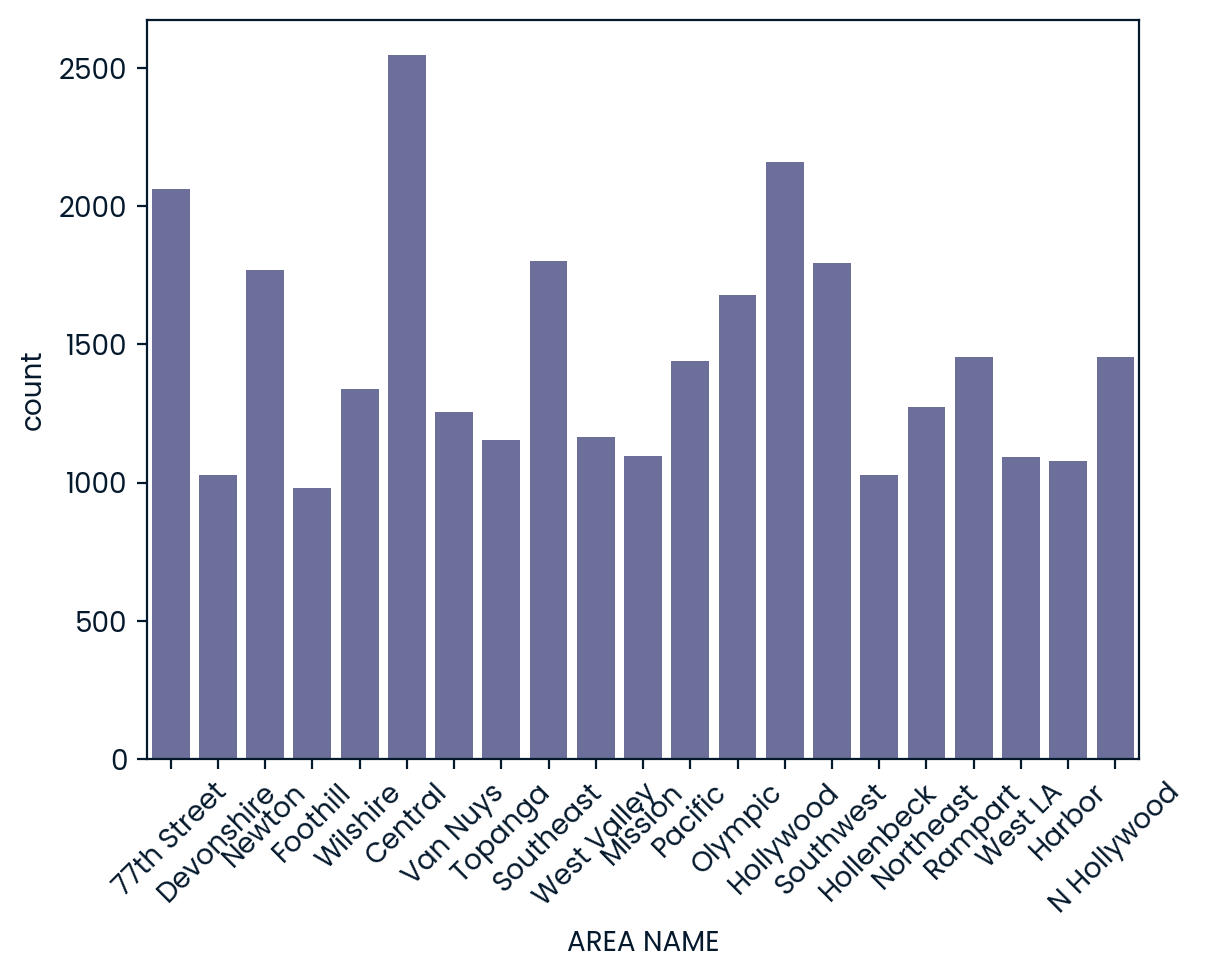

Type of peak_night_crime_location is <class 'str'>


In [53]:
# Subsetting only the night hours
night_hours = crimes[(crimes['TIME_OCC_hour'] < 4) | (crimes['TIME_OCC_hour'] >= 23)]
#Normaly Central has the highest rate
print(f"Rates for all hours \n {crimes['AREA NAME'].value_counts(normalize=True)}")
#Plotting the whole thing to graphically inspect
sns.countplot(data=night_hours, x="AREA NAME")
plt.xticks(rotation=45)
plt.show()
#Grafically is "Central"
#Taking mode
peak_night_crime_location=str(night_hours['AREA NAME'].mode().values)
peak_night_crime_location="Central"
#Making sure is a string
print(f"Type of peak_night_crime_location is {type(peak_night_crime_location)}")

Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [54]:
#we need to create a new column
#checking for na values (no na values)
print(crimes['Vict Age'].isna().sum())
#checking for negative values
print(crimes[crimes['Vict Age']<0])
labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64","65+"]

#conditions
crimes['Vict Age'].dtype
#age column is int
#creating bins for pd.cut() function
bins=[0,17,25,34,44,54,64,np.inf]
#appliyong pd.cut()
victim_ages_binned=pd.cut(crimes['Vict Age'],bins,labels=labels, ordered=True)
victim_ages=victim_ages_binned.value_counts()
#print victim_ages
print(victim_ages)

0
Empty DataFrame
Columns: [DR_NO, Date Rptd, DATE OCC, TIME OCC, AREA NAME, Crm Cd Desc, Vict Age, Vict Sex, Vict Descent, Weapon Desc, Status Desc, LOCATION, TIME_OCC_hour]
Index: []
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Vict Age, dtype: int64
